In [103]:
#load the x_1.json and y_1.json files

import json

with open('x_1.json') as f:
    x_1 = json.load(f)

with open('y_1.json') as f:
    y_1 = json.load(f)

    

In [104]:
import numpy as np
import matplotlib.pyplot as plt


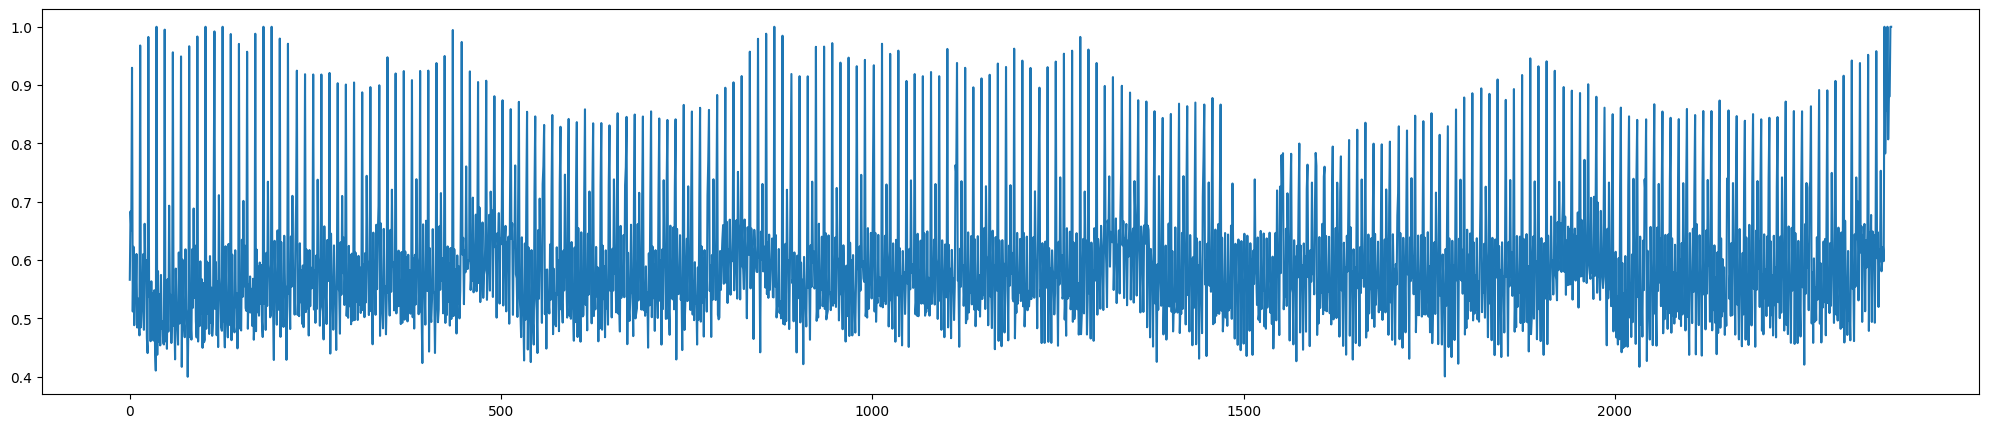

In [105]:
plt.figure(figsize=(25, 5))
plt.plot(x_1,y_1)

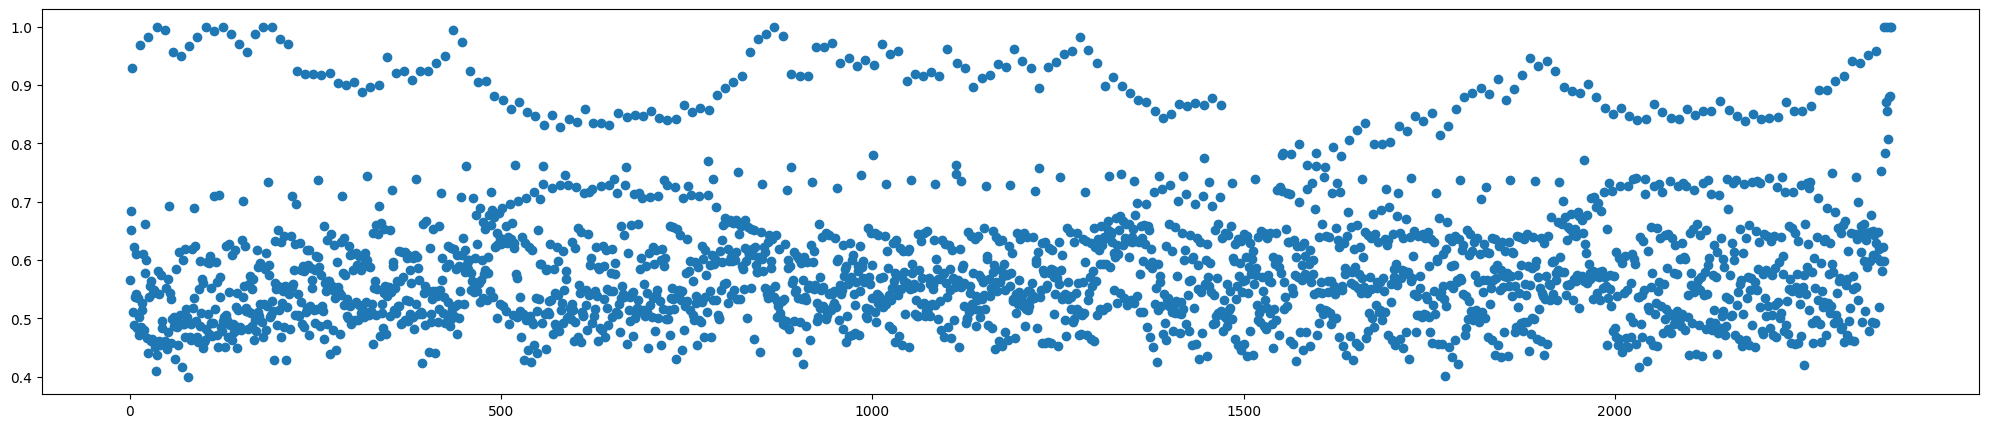

In [106]:
plt.figure(figsize=(25, 5))
plt.scatter(x_1,y_1)

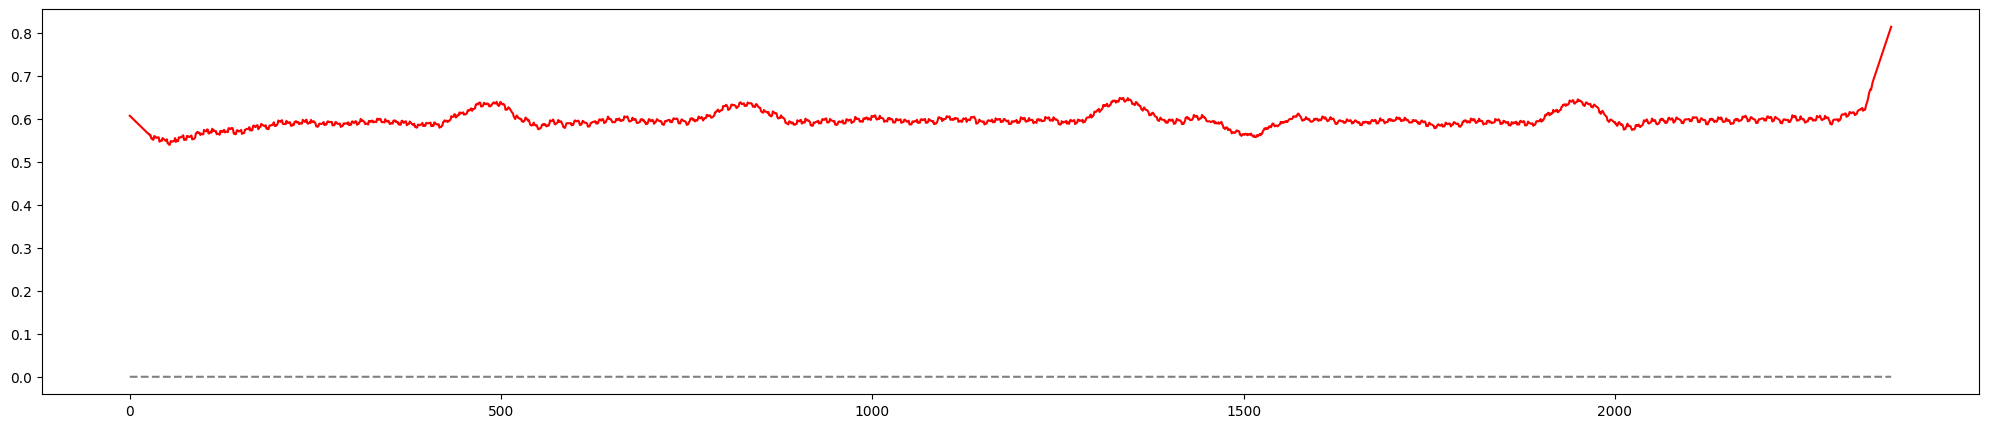

In [107]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y_1, 51, 1) 

from scipy.signal import find_peaks



plt.figure(figsize=(25,5))
plt.plot(x_1,yhat, color='red')
plt.plot(np.zeros_like(yhat), "--", color="gray")

In [108]:
new_y_hat=yhat-np.mean(yhat)

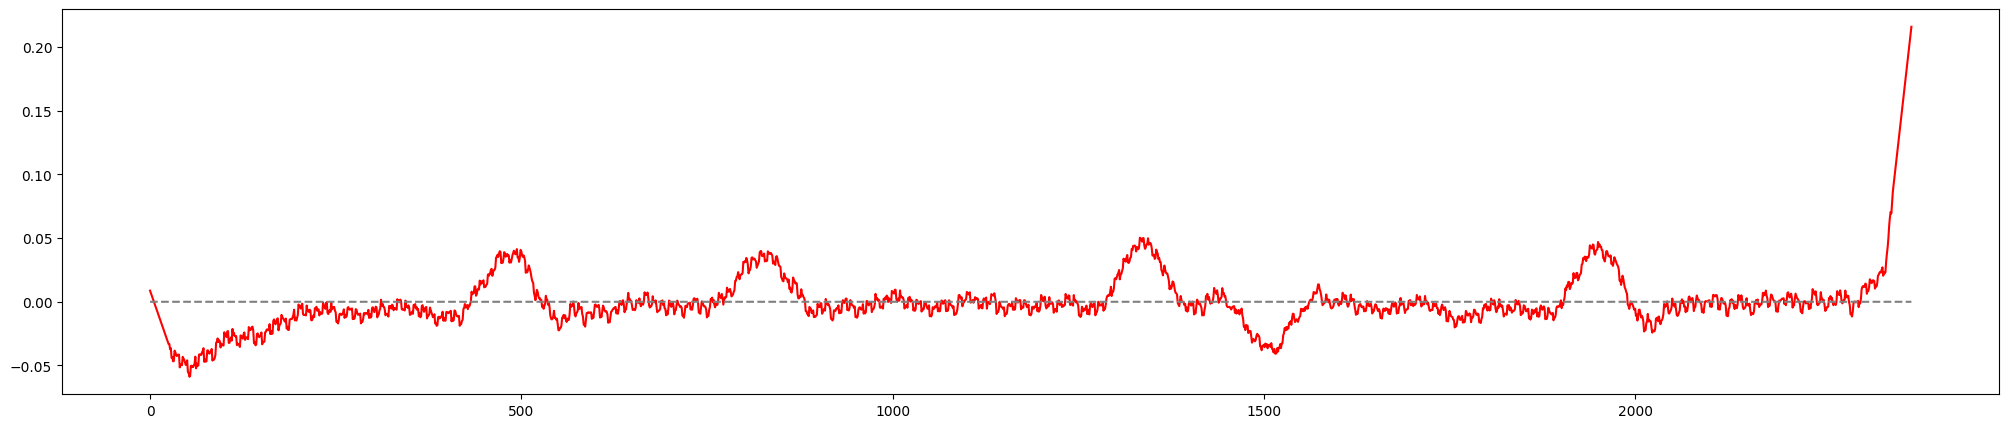

In [109]:
plt.figure(figsize=(25,5))
plt.plot(x_1,new_y_hat, color='red')
plt.plot(np.zeros_like(yhat), "--", color="gray")

In [110]:
len(new_y_hat)

2373

In [112]:
new_y_hat=new_y_hat[50:2333]
x_1=x_1[50:2333]

In [111]:
len(x_1)

2373

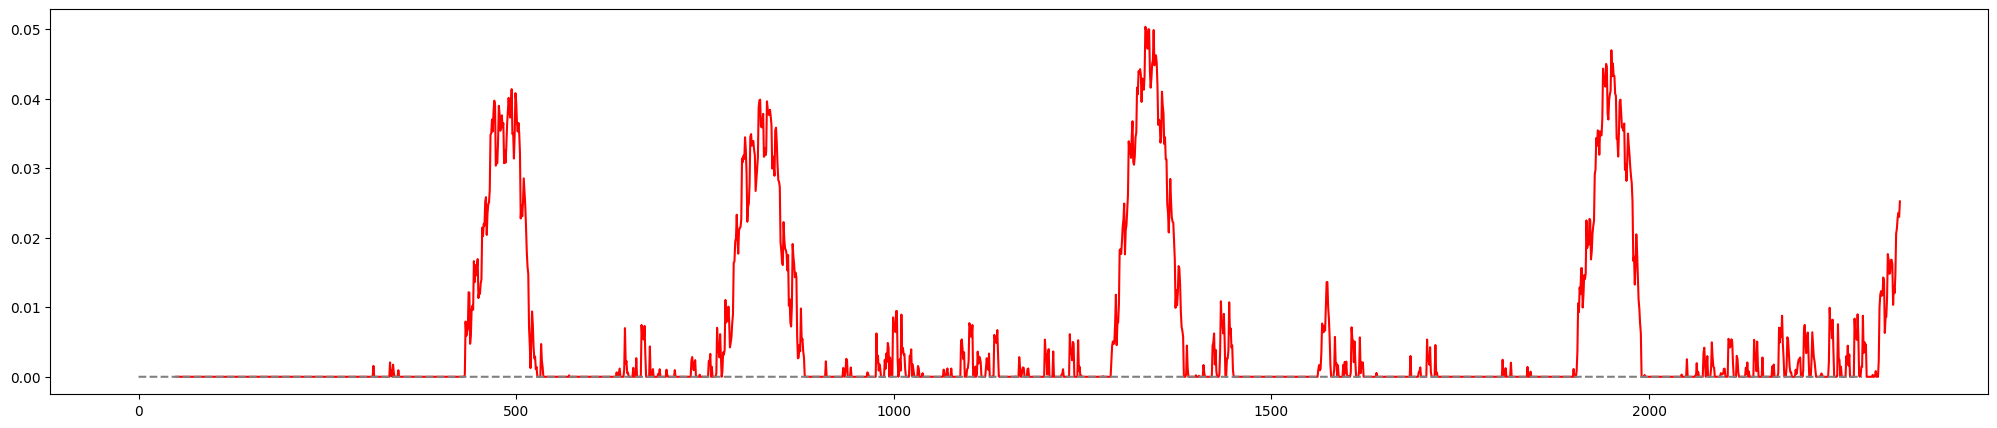

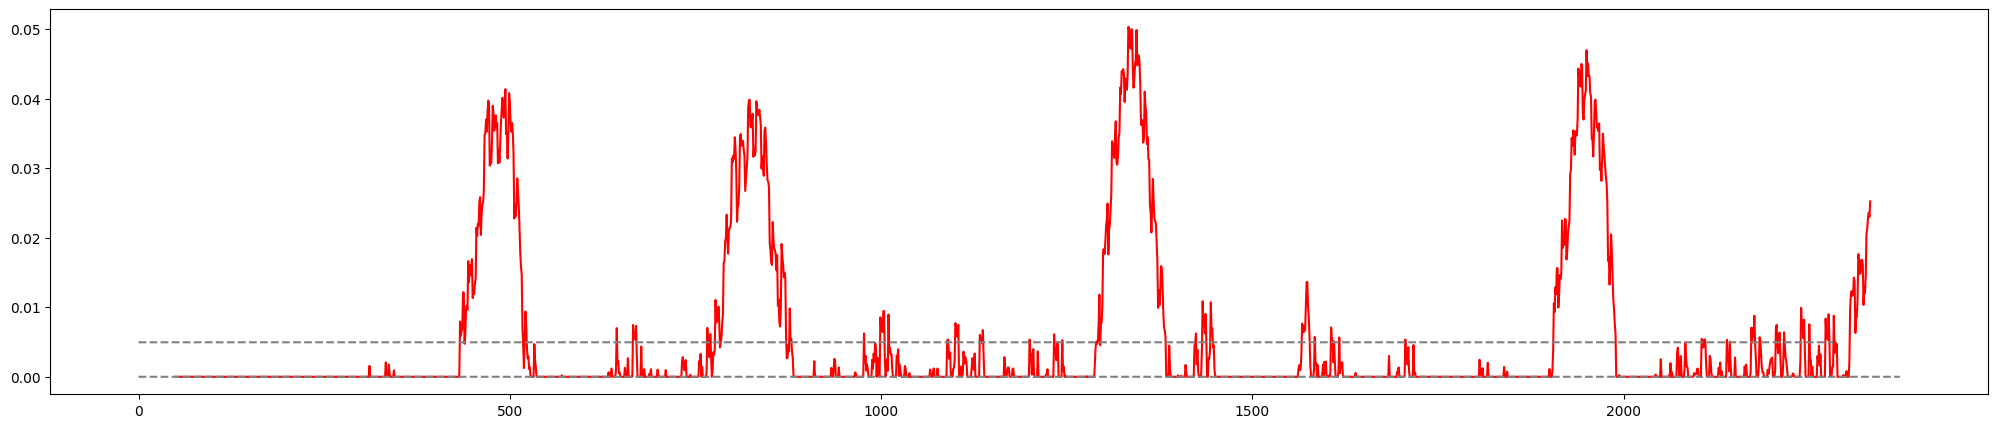

In [113]:
def relu(x):
    return np.maximum(0, x)


plt.figure(figsize=(25,5))
plt.plot(x_1,relu(new_y_hat), color='red')
plt.plot(np.zeros_like(yhat[50:2333]), "--", color="gray")
#plot the mean of the new_y_hat after relu

plt.figure(figsize=(25,5))
plt.plot(x_1,relu(new_y_hat), color='red')
plt.plot(np.zeros_like(yhat), "--", color="gray")
plt.plot(np.mean(relu(new_y_hat))*np.ones_like(yhat[50:2333]), "--", color="gray")



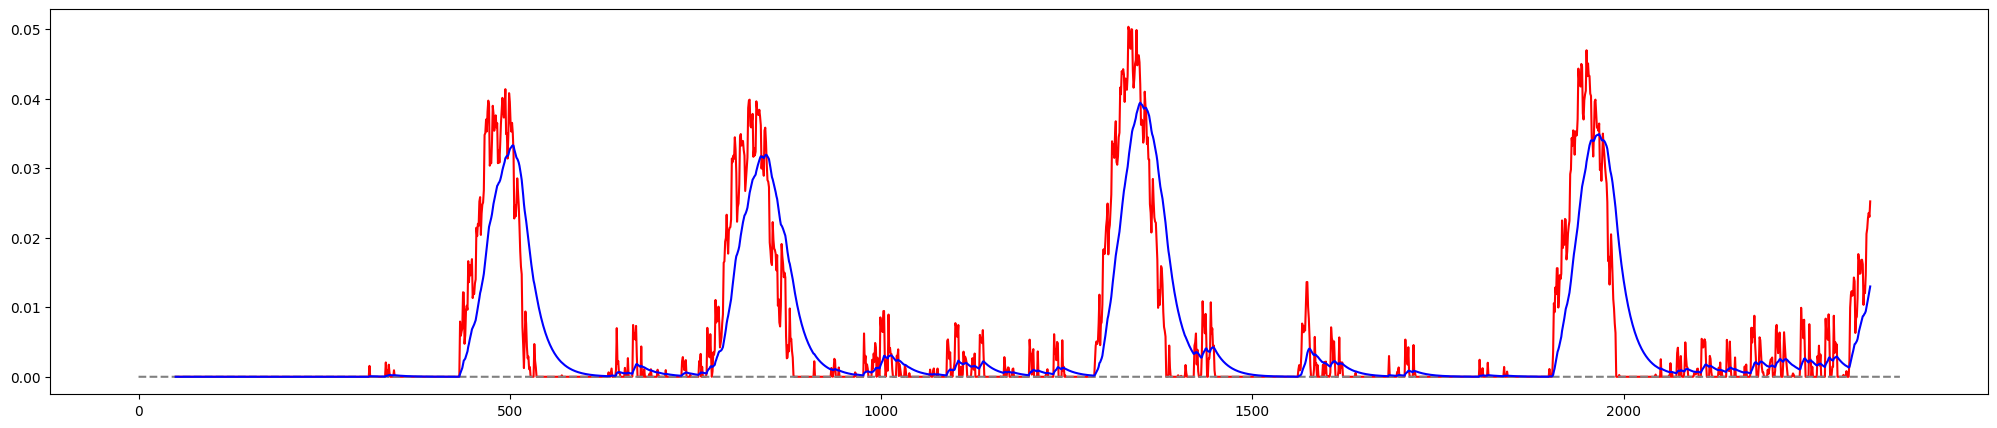

In [114]:
from typing import List


def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed


plt.figure(figsize=(25,5))
plt.plot(x_1,relu(new_y_hat), color='red')
plt.plot(np.zeros_like(yhat), "--", color="gray")
plt.plot(x_1,smooth(relu(new_y_hat),0.95), color='blue')


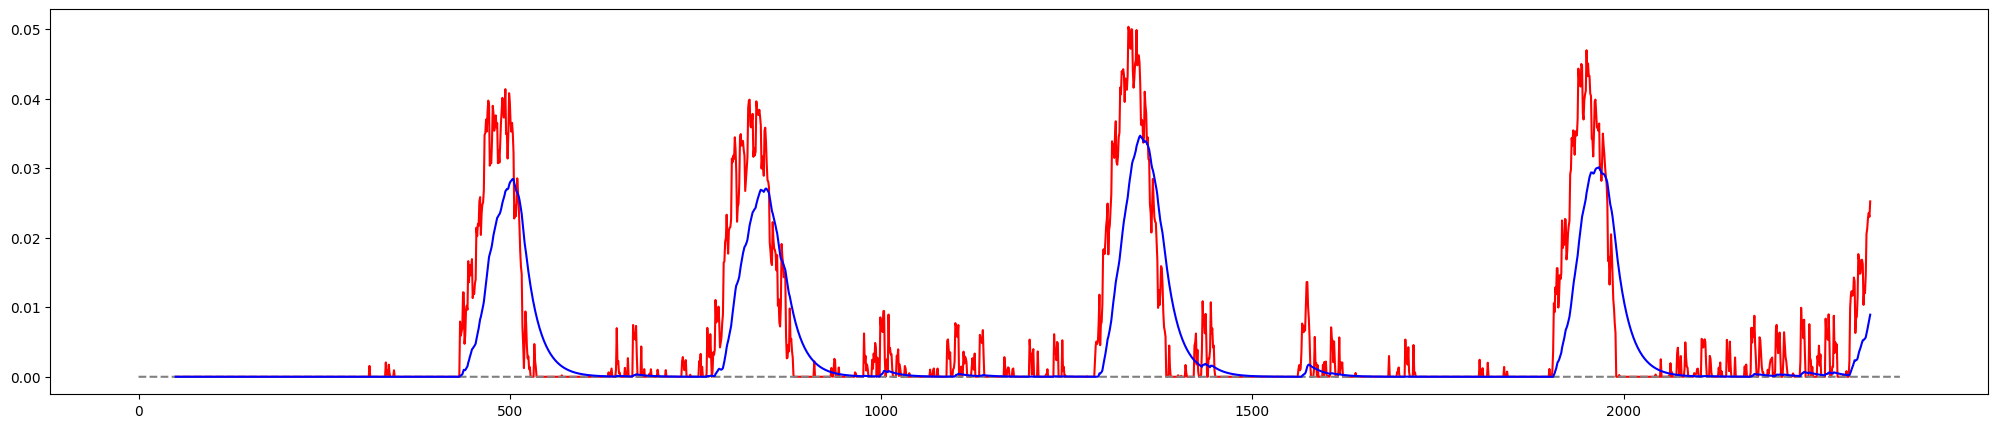

In [115]:
plt.figure(figsize=(25,5))
plt.plot(x_1,relu(new_y_hat), color='red')
plt.plot(np.zeros_like(yhat), "--", color="gray")
plt.plot(x_1,smooth(relu(relu(new_y_hat)-np.mean(relu(new_y_hat))),0.95), color='blue')

TypeError: only integer scalar arrays can be converted to a scalar index

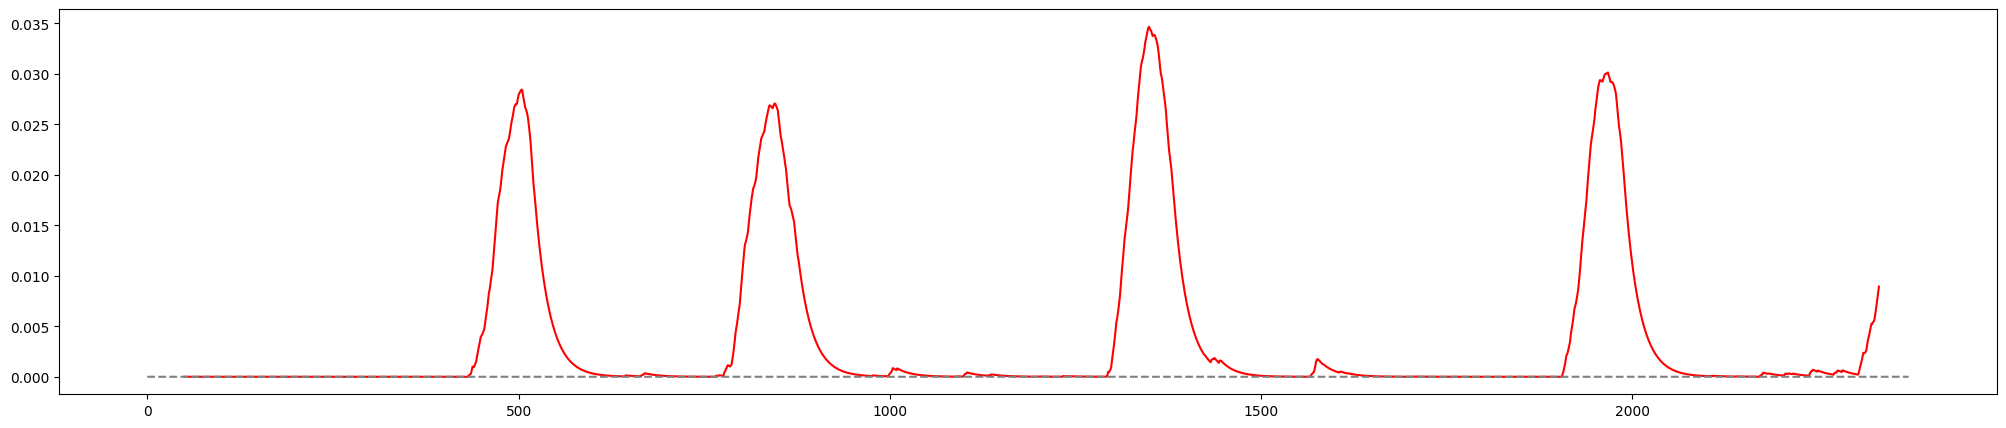

In [117]:
#find the top 5 global maxima of the smoothed curve and plot them

peaks, _ = find_peaks(smooth(relu(relu(new_y_hat)-np.mean(relu(new_y_hat))),0.95), height=0)
plt.figure(figsize=(25,5))
plt.plot(x_1,smooth(relu(relu(new_y_hat)-np.mean(relu(new_y_hat))),0.95), color='red')
plt.plot(np.zeros_like(yhat), "--", color="gray")
plt.plot(x_1[peaks], smooth(relu(relu(new_y_hat)-np.mean(relu(new_y_hat))),0.95)[peaks], "x")




In [2]:
import numpy as np

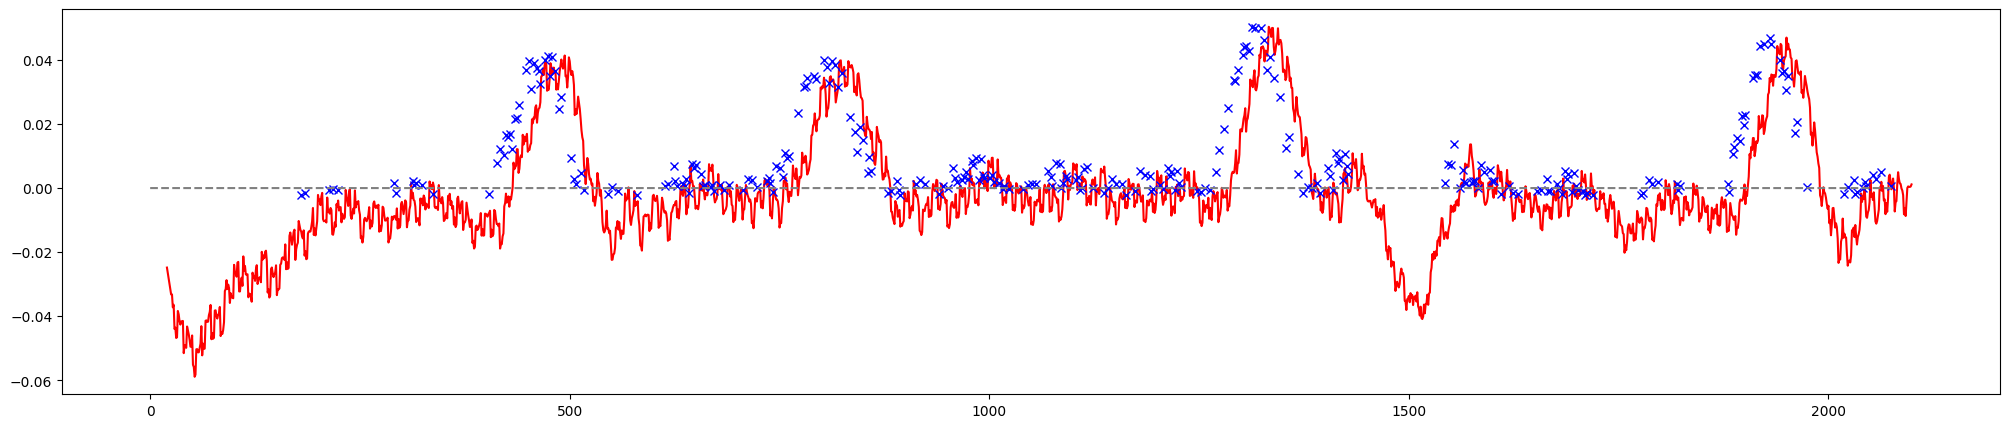

In [82]:
#get the peaks of new_yhat
k=0
new_y_hat=new_y_hat[20:2100]
x_1=x_1[20:2100]
peaks, _ = find_peaks(new_y_hat, height=np.mean(new_y_hat))
plt.figure(figsize=(25,5))
plt.plot(x_1,new_y_hat, color='red')
plt.plot(peaks, new_y_hat[peaks], "x",color="blue")
plt.plot(np.zeros_like(new_y_hat), "--", color="gray")
